# Advanced Physics Laboratory: analysis of beam profile

## Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

## Convert waveform files to numpy array and store

### Path to data

In [2]:
USER_PATH = "/home/rocco/University/APL/Lab/"
DATA_PATH = USER_PATH + "data/profile/beam_profile_short/"

### Unzip all data archives and get number of events

In [3]:
os.chdir(DATA_PATH)
for d in os.listdir("."):
    os.chdir(d)
    
    if not os.path.exists("data"):
        os.system("unzip data.zip -d data")
    os.chdir("../")

### Convert to numpy array

In [4]:
os.chdir(DATA_PATH)
for d in os.listdir("."):
    os.chdir(d)
    
    if not os.path.exists(d+".npy"):
        N = len(os.listdir("./data"))
        M = 5000

        data = np.zeros((N,M),dtype=np.int16)
        for f,i in zip(os.listdir("./data"), range(N)):
            data[i,:] = np.loadtxt("./data/run_"+str(i)+"_segment_0.rpsd")
        np.save(d+".npy", data)

    os.chdir("../")

## Load data

In [5]:
os.chdir(DATA_PATH)
os.chdir("0")

data = np.load("0.npy")
os.chdir(DATA_PATH)
data.shape

(1536, 5000)

## Analysis

### **[Example: 0]**

#### **[Example: 0]** Plot of waveforms

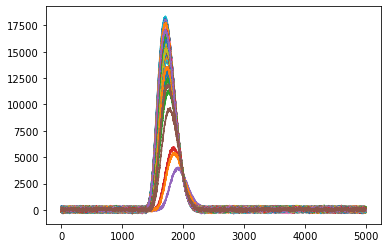

In [6]:
for i in range(data.shape[0]):
    plt.plot(data[i])
plt.show()

#### **[Example: 0]** Plot of integrals of waveforms

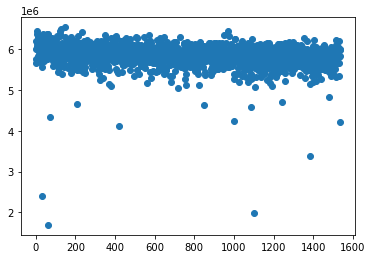

In [7]:
data_int = np.sum(data, axis=1)

plt.plot(data_int, "o")
plt.show()

#### **[Example: 0]** Plot of filtered integrals of waveforms

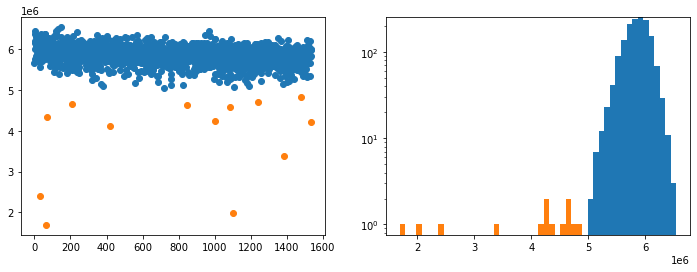

In [8]:
data_int_mean = np.mean(data_int)
data_int_var  = np.std(data_int)

mask_t = np.logical_and(data_int<data_int_mean+data_int_var*3, data_int>data_int_mean-data_int_var*3)
mask_f = np.logical_not(mask_t)

fig=plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(np.where(mask_t)[0], data_int[mask_t], "o")
plt.plot(np.where(mask_f)[0], data_int[mask_f], "o")

plt.subplot(1,2,2)
plt.hist([data_int[mask_t], data_int[mask_f]], bins=50, stacked=True)
plt.yscale("log")
plt.show()

### Now for every angle

In [9]:
angles = []
events = []

PLOT_DATA = False

os.chdir(DATA_PATH)
for d in os.listdir("."):
    os.chdir(d)
    
    if "DX" in d:
        sign = +1
    elif "SX" in d:
        sign = -1
    else:
        sign = 0
    
    angles.append(sign * int(''.join(filter(lambda i: i.isdigit(), d))) * 0.9 * np.pi / 180.0)

    data          = np.load(d+".npy")
    data_int      = np.sum(data, axis=1)
    data_int_mean = np.mean(data_int)
    data_int_var  = np.std(data_int)

    mask_t = np.logical_and(data_int<data_int_mean+data_int_var*3, data_int>data_int_mean-data_int_var*3)
    mask_f = np.logical_not(mask_t)
    
    # events.append(len(os.listdir(os.getcwd())) - 1)
    events.append(data_int[mask_t].shape[0])
    
    if PLOT_DATA:
        fig=plt.figure(figsize=(12, 4))
        plt.subplot(1,2,1)
        if mask_f.shape[0] != 0:
            plt.plot(np.where(mask_t)[0], data_int[mask_t], "o")
            plt.plot(np.where(mask_f)[0], data_int[mask_f], "o")
        else:
            plt.plot(np.where(mask_t)[0], data_int[mask_t], "o")
        plt.title(d)

        plt.subplot(1,2,2)
        if mask_f.shape[0] != 0:
            plt.hist([data_int[mask_t], data_int[mask_f]], bins=50, stacked=True)
        else:
            plt.hist(data_int[mask_t], bins=50, stacked=True)
        plt.yscale("log")
        plt.title(d)
        plt.show()

    os.chdir(DATA_PATH)

### Events distribution

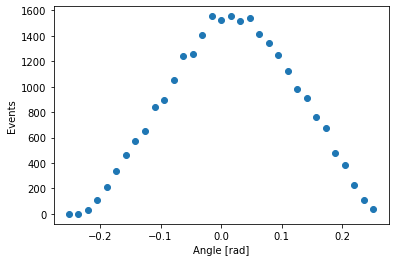

In [10]:
plt.plot(angles, events, "o")
plt.xlabel("Angle [rad]")
plt.ylabel("Events")
plt.show()

In [11]:
np.vstack((np.round(np.array(angles)*180/np.pi,2),np.array(events), np.array(angles))).T

array([[-1.26000000e+01,  2.80000000e+01, -2.19911486e-01],
       [ 7.20000000e+00,  9.82000000e+02,  1.25663706e-01],
       [ 4.50000000e+00,  1.34200000e+03,  7.85398163e-02],
       [ 5.40000000e+00,  1.25100000e+03,  9.42477796e-02],
       [ 1.17000000e+01,  3.82000000e+02,  2.04203522e-01],
       [-1.08000000e+01,  2.10000000e+02, -1.88495559e-01],
       [ 9.00000000e-01,  1.55200000e+03,  1.57079633e-02],
       [-4.50000000e+00,  1.05400000e+03, -7.85398163e-02],
       [-1.80000000e+00,  1.40400000e+03, -3.14159265e-02],
       [-7.20000000e+00,  6.51000000e+02, -1.25663706e-01],
       [ 1.35000000e+01,  1.11000000e+02,  2.35619449e-01],
       [-1.17000000e+01,  1.09000000e+02, -2.04203522e-01],
       [ 1.26000000e+01,  2.27000000e+02,  2.19911486e-01],
       [-8.10000000e+00,  5.69000000e+02, -1.41371669e-01],
       [-9.90000000e+00,  3.35000000e+02, -1.72787596e-01],
       [ 1.80000000e+00,  1.51900000e+03,  3.14159265e-02],
       [ 2.70000000e+00,  1.54000000e+03